In [1]:
import numpy as np
import pandas as pd
import datetime

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [4]:
import pandas as pd
import sklearn
import datetime

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = (12,8)

# these are useful plotting functions.
def histogram(df, col_name, bins):
    plt.hist(df[col_name], alpha=0.5, label=col_name, bins=bins)
    plt.legend(loc='upper right')
    plt.show()

def barchart(df, col_name):
    df[col_name].value_counts().plot(kind='bar', subplots=False)

def boxplot(df, col_names, by=None):
    #fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 8), sharey=True)
    df.boxplot(column=col_names, return_type='axes', by=by)

def histogram_by_level(df, varName, targetName):
    lvls = df[varName].value_counts()
    for i in lvls.index:
        plt.hist(df[df[varName] == i][targetName], alpha=0.5, label=i, bins=300)

    plt.legend(loc='upper right')
    plt.show()


In [206]:
trans_df = pd.read_csv('Sample Data.csv')
trans_df.head()

,Card_number,Card_type,Domestic_travel_spend_3,Domestic_travel_trans_3,Domestic_travel_spend_6,Domestic_travel_trans_6,Domestic_travel_spend_9,Domestic_travel_trans_9,Domestic_travel_spend_12,Domestic_travel_trans_12,...,Restaurant_spend_12,Restaurant_trans_12,Shopping_spend_3,Shopping_trans_3,Shopping_spend_6,Shopping_trans_6,Shopping_spend_9,Shopping_trans_9,Shopping_spend_12,Shopping_trans_12
0,51634000001,Higher,11910,15,17589,19,16644,14,18388,18,...,3689,22,2521,13,2030,14,3816,11,2432,10
1,81617000002,Higher,11834,18,12311,13,19368,15,13157,22,...,4907,17,3228,10,3898,14,2966,11,2282,13
2,16722000003,Higher,17329,14,13290,12,16510,13,16744,19,...,3289,20,3425,12,2555,10,3546,15,2180,10
3,69422000004,Higher,19139,12,10034,15,10220,18,18494,14,...,4793,21,3521,11,2866,15,3522,15,3276,14
4,27582000005,Higher,15210,22,12278,14,15692,19,14942,24,...,4646,15,3058,15,3103,14,3030,15,3115,12


In [207]:
df_mod = trans_df.drop(['Card_number','Card_type'],axis = 1)

In [208]:
# standardizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_mod)
data_scaled_df = pd.DataFrame(data_scaled, columns = df_mod.columns)

# statistics of scaled data
pd.DataFrame(data_scaled_df).describe()

,Domestic_travel_spend_3,Domestic_travel_trans_3,Domestic_travel_spend_6,Domestic_travel_trans_6,Domestic_travel_spend_9,Domestic_travel_trans_9,Domestic_travel_spend_12,Domestic_travel_trans_12,International_travel_spend_3,International_travel_trans_3,...,Restaurant_spend_12,Restaurant_trans_12,Shopping_spend_3,Shopping_trans_3,Shopping_spend_6,Shopping_trans_6,Shopping_spend_9,Shopping_trans_9,Shopping_spend_12,Shopping_trans_12
count,9.999900e+04,9.999900e+04,9.999900e+04,9.999900e+04,9.999900e+04,9.999900e+04,9.999900e+04,9.999900e+04,9.999900e+04,9.999900e+04,...,9.999900e+04,9.999900e+04,9.999900e+04,9.999900e+04,9.999900e+04,9.999900e+04,9.999900e+04,9.999900e+04,9.999900e+04,9.999900e+04
mean,-4.519763e-17,1.217026e-15,-1.728190e-16,-4.896688e-16,2.474490e-16,-5.803771e-16,-3.038156e-16,7.124062e-16,-7.449227e-17,1.646499e-16,...,2.780548e-16,-4.147180e-16,-9.068392e-18,1.305255e-16,6.212648e-17,5.568712e-16,5.754343e-17,-2.218316e-16,6.284307e-17,-9.477994e-16
std,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,...,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00
min,-1.760575e+00,-1.636878e+00,-1.752845e+00,-1.638939e+00,-1.755123e+00,-1.647626e+00,-1.760465e+00,-1.632736e+00,-1.741829e+00,-1.788052e+00,...,-2.454341e+00,-2.364841e+00,-2.773372e+00,-5.901506e+00,-2.783095e+00,-5.893885e+00,-2.779366e+00,-5.888101e+00,-2.773044e+00,-5.901996e+00
25%,-7.245491e-01,-7.413779e-01,-7.268716e-01,-7.430717e-01,-7.251866e-01,-7.477334e-01,-7.253201e-01,-7.389452e-01,-7.662514e-01,-8.943137e-01,...,-7.170304e-01,-7.650701e-01,-7.578357e-01,-6.385174e-01,-7.609325e-01,-6.375522e-01,-7.625441e-01,-6.354790e-01,-7.600922e-01,-6.384390e-01
50%,-1.256172e-01,-2.040776e-01,-1.279283e-01,-2.055516e-01,-1.304072e-01,-2.077980e-01,-1.272218e-01,-2.026708e-01,-4.423349e-02,-5.749777e-04,...,-4.537856e-03,3.481536e-02,-2.670974e-02,-1.122186e-01,-2.008453e-02,-1.119190e-01,-2.017288e-02,-1.102169e-01,-2.567495e-02,-1.120833e-01
75%,7.001484e-01,6.914228e-01,7.037935e-01,6.903154e-01,6.997584e-01,6.920943e-01,7.017386e-01,6.911198e-01,6.698963e-01,7.442073e-01,...,8.139223e-01,8.347008e-01,7.608738e-01,9.403791e-01,7.602754e-01,9.393476e-01,7.645389e-01,9.403075e-01,7.623082e-01,9.406281e-01
max,2.464122e+00,1.945123e+00,2.455946e+00,1.944529e+00,2.453985e+00,1.951943e+00,2.460641e+00,1.942427e+00,2.409787e+00,1.786902e+00,...,1.728590e+00,1.634586e+00,2.872388e+00,1.466678e+00,2.861461e+00,1.464981e+00,2.866042e+00,1.465570e+00,2.865476e+00,1.466984e+00


In [27]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, init='k-means++')

# fitting the k means algorithm on scaled data
kmeans.fit(data_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [28]:
# inertia on the fitted data
kmeans.inertia_

1146111.6276639071

In [209]:
# fitting multiple k-means algorithms and storing the values in an empty list
SSE = []
for cluster in range(4,12):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
    kmeans.fit(data_scaled)
    SSE.append(kmeans.inertia_)

Text(0,0.5,'Inertia')

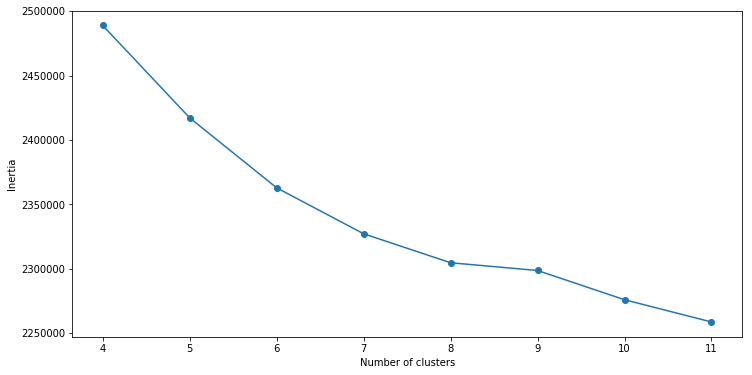

In [210]:
# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(4,12), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [211]:
SSE

[2489002.483560715,
 2417243.5589188635,
 2362909.5855226805,
 2327239.197531192,
 2304735.158024287,
 2298720.418042211,
 2276019.6053098775,
 2258745.674531667]

In [255]:
trans_df = pd.read_csv('Sample Data.csv')
df_mod = trans_df.drop(['Card_number','Card_type'],axis = 1)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_mod)
#data_scaled_df = pd.DataFrame(data_scaled, columns = df_mod.columns)
# k means using 5 clusters and k-means++ initialization
kmeans = KMeans(n_jobs = -1, n_clusters = 9, init='k-means++')
kmeans.fit(data_scaled)
pred = kmeans.predict(data_scaled)
frame = pd.DataFrame(data_scaled)
frame['cluster'] = pred
frame['cluster'].value_counts()

0    20227
3    19221
6    13513
7    13270
2    10077
1     6692
5     6519
8     5624
4     4856
Name: cluster, dtype: int64

In [256]:
trans_df['cluster'] = pred
frame['Card_number'] = trans_df['Card_number']
frame['Card_type'] = trans_df['Card_type']

In [257]:
pd.crosstab(frame['cluster'],frame['Card_type'])

Card_type,Higher,Lower
cluster,,
0,3820,16407
1,24,6668
2,1,10076
3,9,19212
4,1,4855
5,1,6518
6,847,12666
7,821,12449
8,0,5624


In [241]:
frame.columns

Index([            0,             1,             2,             3,
                   4,             5,             6,             7,
                   8,             9,            10,            11,
                  12,            13,            14,            15,
                  16,            17,            18,            19,
                  20,            21,            22,            23,
                  24,            25,            26,            27,
                  28,            29,            30,            31,
                  32,            33,            34,            35,
                  36,            37,            38,            39,
           'cluster', 'Card_number',   'Card_type'],
      dtype='object')

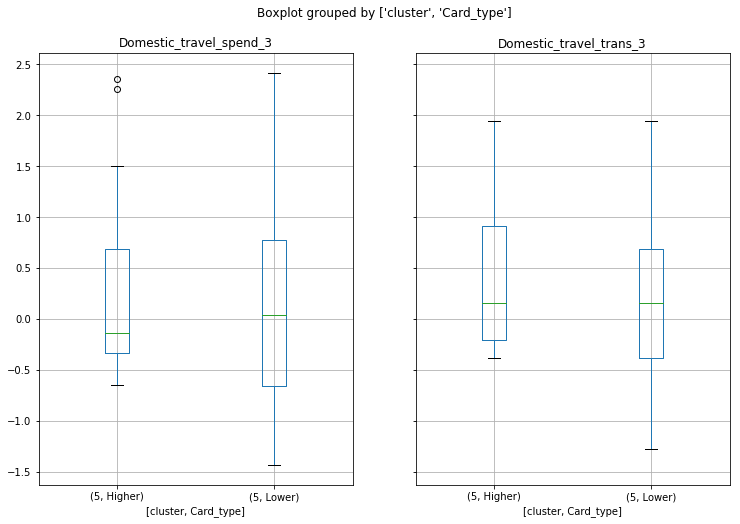

In [223]:
boxplot(frame[frame['cluster']==5], ['Domestic_travel_spend_3','Domestic_travel_trans_3'], by=['cluster','Card_type'])

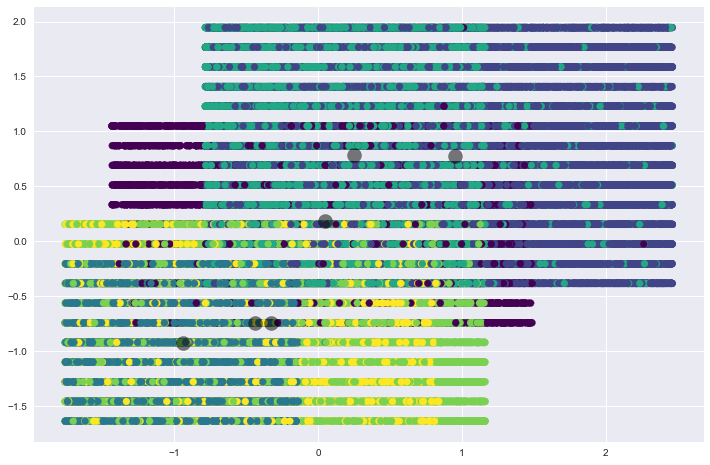

In [246]:
import seaborn as sns; sns.set()
plt.scatter(frame.iloc[:, 0], frame.iloc[:, 1], c=pred, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

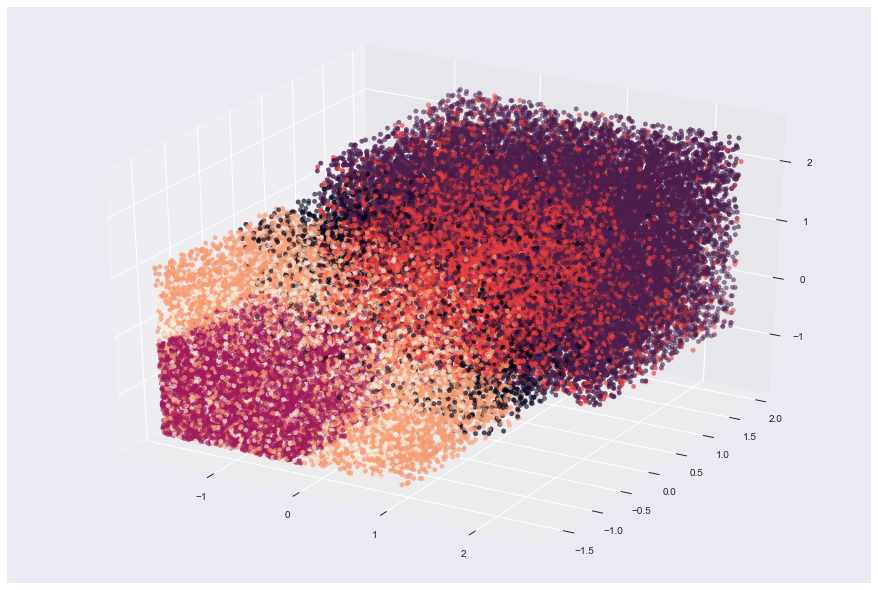

In [254]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(frame.iloc[:, 0], frame.iloc[:, 1], frame.iloc[:, 2], c=pred)
ax.scatter(centers[:, 1], centers[:, 3], marker='*', c='#050505', s=1000)